In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os 
from datetime import date
from time import strftime 
import seaborn as sns



In [2]:
df = pd.read_csv("clean_data.csv")
df

,person,dept,eow,cause,cause_short,date,year,canine,dept_name,state
0,Constable Darius Quimby,"Albany County Constable's Office, NY","EOW: Monday, January 3, 1791",Cause of Death: Gunfire,Gunfire,1791-01-03,1791,False,Albany County Constable's Office,NY
1,Sheriff Cornelius Hogeboom,"Columbia County Sheriff's Office, NY","EOW: Saturday, October 22, 1791",Cause of Death: Gunfire,Gunfire,1791-10-22,1791,False,Columbia County Sheriff's Office,NY
2,Deputy Sheriff Isaac Smith,"Westchester County Sheriff's Department, NY","EOW: Thursday, May 17, 1792",Cause of Death: Gunfire,Gunfire,1792-05-17,1792,False,Westchester County Sheriff's Department,NY
3,Marshal Robert Forsyth,United States Department of Justice - United S...,"EOW: Saturday, January 11, 1794",Cause of Death: Gunfire,Gunfire,1794-01-11,1794,False,United States Department of Justice - United S...,US
4,Sheriff Robert Maxwell,"Greenville County Sheriff's Office, SC","EOW: Sunday, November 12, 1797",Cause of Death: Gunfire,Gunfire,1797-11-12,1797,False,Greenville County Sheriff's Office,SC
...,...,...,...,...,...,...,...,...,...,...
22795,K9 Bruno,"Amarillo Police Department, TX","EOW: Sunday, June 12, 2016",Cause of Death: Accidental,Accidental,2016-06-12,2016,True,Amarillo Police Department,TX
22796,K9 Lazer,United States Department of Homeland Security ...,"EOW: Monday, June 20, 2016",Cause of Death: Heat exhaustion,Heat exhaustion,2016-06-20,2016,True,United States Department of Homeland Security ...,US
22797,K9 Tyson,"Fountain County Sheriff's Office, IN","EOW: Monday, June 27, 2016",Cause of Death: Heat exhaustion,Heat exhaustion,2016-06-27,2016,True,Fountain County Sheriff's Office,IN
22798,K9 Credo,"Long Beach Police Department, CA","EOW: Tuesday, June 28, 2016",Cause of Death: Gunfire (Accidental),Gunfire (Accidental),2016-06-28,2016,True,Long Beach Police Department,CA


# DATA CLEANING

In [3]:
df.drop(df.columns[[3]],axis=1,inplace=True)
df

,person,dept,eow,cause_short,date,year,canine,dept_name,state
0,Constable Darius Quimby,"Albany County Constable's Office, NY","EOW: Monday, January 3, 1791",Gunfire,1791-01-03,1791,False,Albany County Constable's Office,NY
1,Sheriff Cornelius Hogeboom,"Columbia County Sheriff's Office, NY","EOW: Saturday, October 22, 1791",Gunfire,1791-10-22,1791,False,Columbia County Sheriff's Office,NY
2,Deputy Sheriff Isaac Smith,"Westchester County Sheriff's Department, NY","EOW: Thursday, May 17, 1792",Gunfire,1792-05-17,1792,False,Westchester County Sheriff's Department,NY
3,Marshal Robert Forsyth,United States Department of Justice - United S...,"EOW: Saturday, January 11, 1794",Gunfire,1794-01-11,1794,False,United States Department of Justice - United S...,US
4,Sheriff Robert Maxwell,"Greenville County Sheriff's Office, SC","EOW: Sunday, November 12, 1797",Gunfire,1797-11-12,1797,False,Greenville County Sheriff's Office,SC
...,...,...,...,...,...,...,...,...,...
22795,K9 Bruno,"Amarillo Police Department, TX","EOW: Sunday, June 12, 2016",Accidental,2016-06-12,2016,True,Amarillo Police Department,TX
22796,K9 Lazer,United States Department of Homeland Security ...,"EOW: Monday, June 20, 2016",Heat exhaustion,2016-06-20,2016,True,United States Department of Homeland Security ...,US
22797,K9 Tyson,"Fountain County Sheriff's Office, IN","EOW: Monday, June 27, 2016",Heat exhaustion,2016-06-27,2016,True,Fountain County Sheriff's Office,IN
22798,K9 Credo,"Long Beach Police Department, CA","EOW: Tuesday, June 28, 2016",Gunfire (Accidental),2016-06-28,2016,True,Long Beach Police Department,CA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22800 entries, 0 to 22799
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   person       22800 non-null  object
 1   dept         22800 non-null  object
 2   eow          22800 non-null  object
 3   cause_short  22800 non-null  object
 4   date         22800 non-null  object
 5   year         22800 non-null  int64 
 6   canine       22800 non-null  bool  
 7   dept_name    22800 non-null  object
 8   state        22800 non-null  object
dtypes: bool(1), int64(1), object(7)
memory usage: 1.4+ MB


In [5]:
df.isnull().sum()

person         0
dept           0
eow            0
cause_short    0
date           0
year           0
canine         0
dept_name      0
state          0
dtype: int64

In [6]:
df=df.rename(columns={'cause_short':'cause'})
df

,person,dept,eow,cause,date,year,canine,dept_name,state
0,Constable Darius Quimby,"Albany County Constable's Office, NY","EOW: Monday, January 3, 1791",Gunfire,1791-01-03,1791,False,Albany County Constable's Office,NY
1,Sheriff Cornelius Hogeboom,"Columbia County Sheriff's Office, NY","EOW: Saturday, October 22, 1791",Gunfire,1791-10-22,1791,False,Columbia County Sheriff's Office,NY
2,Deputy Sheriff Isaac Smith,"Westchester County Sheriff's Department, NY","EOW: Thursday, May 17, 1792",Gunfire,1792-05-17,1792,False,Westchester County Sheriff's Department,NY
3,Marshal Robert Forsyth,United States Department of Justice - United S...,"EOW: Saturday, January 11, 1794",Gunfire,1794-01-11,1794,False,United States Department of Justice - United S...,US
4,Sheriff Robert Maxwell,"Greenville County Sheriff's Office, SC","EOW: Sunday, November 12, 1797",Gunfire,1797-11-12,1797,False,Greenville County Sheriff's Office,SC
...,...,...,...,...,...,...,...,...,...
22795,K9 Bruno,"Amarillo Police Department, TX","EOW: Sunday, June 12, 2016",Accidental,2016-06-12,2016,True,Amarillo Police Department,TX
22796,K9 Lazer,United States Department of Homeland Security ...,"EOW: Monday, June 20, 2016",Heat exhaustion,2016-06-20,2016,True,United States Department of Homeland Security ...,US
22797,K9 Tyson,"Fountain County Sheriff's Office, IN","EOW: Monday, June 27, 2016",Heat exhaustion,2016-06-27,2016,True,Fountain County Sheriff's Office,IN
22798,K9 Credo,"Long Beach Police Department, CA","EOW: Tuesday, June 28, 2016",Gunfire (Accidental),2016-06-28,2016,True,Long Beach Police Department,CA


In [7]:
df.drop(df.columns[[7]],axis=1,inplace=True)
df

,person,dept,eow,cause,date,year,canine,state
0,Constable Darius Quimby,"Albany County Constable's Office, NY","EOW: Monday, January 3, 1791",Gunfire,1791-01-03,1791,False,NY
1,Sheriff Cornelius Hogeboom,"Columbia County Sheriff's Office, NY","EOW: Saturday, October 22, 1791",Gunfire,1791-10-22,1791,False,NY
2,Deputy Sheriff Isaac Smith,"Westchester County Sheriff's Department, NY","EOW: Thursday, May 17, 1792",Gunfire,1792-05-17,1792,False,NY
3,Marshal Robert Forsyth,United States Department of Justice - United S...,"EOW: Saturday, January 11, 1794",Gunfire,1794-01-11,1794,False,US
4,Sheriff Robert Maxwell,"Greenville County Sheriff's Office, SC","EOW: Sunday, November 12, 1797",Gunfire,1797-11-12,1797,False,SC
...,...,...,...,...,...,...,...,...
22795,K9 Bruno,"Amarillo Police Department, TX","EOW: Sunday, June 12, 2016",Accidental,2016-06-12,2016,True,TX
22796,K9 Lazer,United States Department of Homeland Security ...,"EOW: Monday, June 20, 2016",Heat exhaustion,2016-06-20,2016,True,US
22797,K9 Tyson,"Fountain County Sheriff's Office, IN","EOW: Monday, June 27, 2016",Heat exhaustion,2016-06-27,2016,True,IN
22798,K9 Credo,"Long Beach Police Department, CA","EOW: Tuesday, June 28, 2016",Gunfire (Accidental),2016-06-28,2016,True,CA


In [8]:
df.state.unique()

array([' NY', ' US', ' SC', ' NC', ' KY', ' ME', ' MD', ' TN', ' OH',
       ' VA', ' IN', ' PA', ' MA', ' RI', ' CT', ' MO', ' TX', ' FL',
       ' WI', ' AL', ' TR', ' CA', ' GA', ' WA', ' UT', ' IL', ' NJ',
       ' LA', ' NV', ' ID', ' DE', ' MI', ' OR', ' AZ', ' KS', ' IA',
       ' NE', ' NM', ' WV', ' AR', ' CO', ' RR', ' DC', ' MN', ' MT',
       ' MS', ' ND', ' SD', ' NH', ' WY', ' OK', ' VT', ' HI', ' PR',
       ' AK', ' CZ', ' VI', ' GU', ' AS', ' MP'], dtype=object)

In [9]:
df.state.nunique()

60

In [10]:
df.dept.unique()

array(["Albany County Constable's Office, NY",
       "Columbia County Sheriff's Office, NY",
       "Westchester County Sheriff's Department, NY", ...,
       'San Juan Police Department, TX',
       'Cherokee County School District Police Department, GA',
       "Fountain County Sheriff's Office, IN"], dtype=object)

In [11]:
df.dept.nunique()

6528

In [12]:
df.shape

(22800, 8)

In [13]:
df=df.rename(columns={'person':'name'})
df

,name,dept,eow,cause,date,year,canine,state
0,Constable Darius Quimby,"Albany County Constable's Office, NY","EOW: Monday, January 3, 1791",Gunfire,1791-01-03,1791,False,NY
1,Sheriff Cornelius Hogeboom,"Columbia County Sheriff's Office, NY","EOW: Saturday, October 22, 1791",Gunfire,1791-10-22,1791,False,NY
2,Deputy Sheriff Isaac Smith,"Westchester County Sheriff's Department, NY","EOW: Thursday, May 17, 1792",Gunfire,1792-05-17,1792,False,NY
3,Marshal Robert Forsyth,United States Department of Justice - United S...,"EOW: Saturday, January 11, 1794",Gunfire,1794-01-11,1794,False,US
4,Sheriff Robert Maxwell,"Greenville County Sheriff's Office, SC","EOW: Sunday, November 12, 1797",Gunfire,1797-11-12,1797,False,SC
...,...,...,...,...,...,...,...,...
22795,K9 Bruno,"Amarillo Police Department, TX","EOW: Sunday, June 12, 2016",Accidental,2016-06-12,2016,True,TX
22796,K9 Lazer,United States Department of Homeland Security ...,"EOW: Monday, June 20, 2016",Heat exhaustion,2016-06-20,2016,True,US
22797,K9 Tyson,"Fountain County Sheriff's Office, IN","EOW: Monday, June 27, 2016",Heat exhaustion,2016-06-27,2016,True,IN
22798,K9 Credo,"Long Beach Police Department, CA","EOW: Tuesday, June 28, 2016",Gunfire (Accidental),2016-06-28,2016,True,CA


In [14]:
df['date'] = pd.to_datetime(df['date']).astype('datetime64[ns]')

In [15]:
df.head()

,name,dept,eow,cause,date,year,canine,state
0,Constable Darius Quimby,"Albany County Constable's Office, NY","EOW: Monday, January 3, 1791",Gunfire,1791-01-03,1791,False,NY
1,Sheriff Cornelius Hogeboom,"Columbia County Sheriff's Office, NY","EOW: Saturday, October 22, 1791",Gunfire,1791-10-22,1791,False,NY
2,Deputy Sheriff Isaac Smith,"Westchester County Sheriff's Department, NY","EOW: Thursday, May 17, 1792",Gunfire,1792-05-17,1792,False,NY
3,Marshal Robert Forsyth,United States Department of Justice - United S...,"EOW: Saturday, January 11, 1794",Gunfire,1794-01-11,1794,False,US
4,Sheriff Robert Maxwell,"Greenville County Sheriff's Office, SC","EOW: Sunday, November 12, 1797",Gunfire,1797-11-12,1797,False,SC


In [16]:
df1 = df["eow"].str.split(":",n=1,expand = True)
df1.head()

,0,1
0,EOW,"Monday, January 3, 1791"
1,EOW,"Saturday, October 22, 1791"
2,EOW,"Thursday, May 17, 1792"
3,EOW,"Saturday, January 11, 1794"
4,EOW,"Sunday, November 12, 1797"


In [17]:
df['eow']=df1[1]
df['EOW']=df1[0]
df.head()

,name,dept,eow,cause,date,year,canine,state,EOW
0,Constable Darius Quimby,"Albany County Constable's Office, NY","Monday, January 3, 1791",Gunfire,1791-01-03,1791,False,NY,EOW
1,Sheriff Cornelius Hogeboom,"Columbia County Sheriff's Office, NY","Saturday, October 22, 1791",Gunfire,1791-10-22,1791,False,NY,EOW
2,Deputy Sheriff Isaac Smith,"Westchester County Sheriff's Department, NY","Thursday, May 17, 1792",Gunfire,1792-05-17,1792,False,NY,EOW
3,Marshal Robert Forsyth,United States Department of Justice - United S...,"Saturday, January 11, 1794",Gunfire,1794-01-11,1794,False,US,EOW
4,Sheriff Robert Maxwell,"Greenville County Sheriff's Office, SC","Sunday, November 12, 1797",Gunfire,1797-11-12,1797,False,SC,EOW


In [18]:
df.drop('EOW',axis = 'columns',inplace = True)
df

,name,dept,eow,cause,date,year,canine,state
0,Constable Darius Quimby,"Albany County Constable's Office, NY","Monday, January 3, 1791",Gunfire,1791-01-03,1791,False,NY
1,Sheriff Cornelius Hogeboom,"Columbia County Sheriff's Office, NY","Saturday, October 22, 1791",Gunfire,1791-10-22,1791,False,NY
2,Deputy Sheriff Isaac Smith,"Westchester County Sheriff's Department, NY","Thursday, May 17, 1792",Gunfire,1792-05-17,1792,False,NY
3,Marshal Robert Forsyth,United States Department of Justice - United S...,"Saturday, January 11, 1794",Gunfire,1794-01-11,1794,False,US
4,Sheriff Robert Maxwell,"Greenville County Sheriff's Office, SC","Sunday, November 12, 1797",Gunfire,1797-11-12,1797,False,SC
...,...,...,...,...,...,...,...,...
22795,K9 Bruno,"Amarillo Police Department, TX","Sunday, June 12, 2016",Accidental,2016-06-12,2016,True,TX
22796,K9 Lazer,United States Department of Homeland Security ...,"Monday, June 20, 2016",Heat exhaustion,2016-06-20,2016,True,US
22797,K9 Tyson,"Fountain County Sheriff's Office, IN","Monday, June 27, 2016",Heat exhaustion,2016-06-27,2016,True,IN
22798,K9 Credo,"Long Beach Police Department, CA","Tuesday, June 28, 2016",Gunfire (Accidental),2016-06-28,2016,True,CA


# Create a Visualization of the death rate by each country in sorted order

In [19]:
deathrates = pd.DataFrame(df.groupby(['state'])['name'].count()).reset_index()
deathrates

,state,name
0,AK,48
1,AL,537
2,AR,284
3,AS,3
4,AZ,273
5,CA,1639
6,CO,305
7,CT,144
8,CZ,3
9,DC,128


/Users/parthibanramakrishnan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


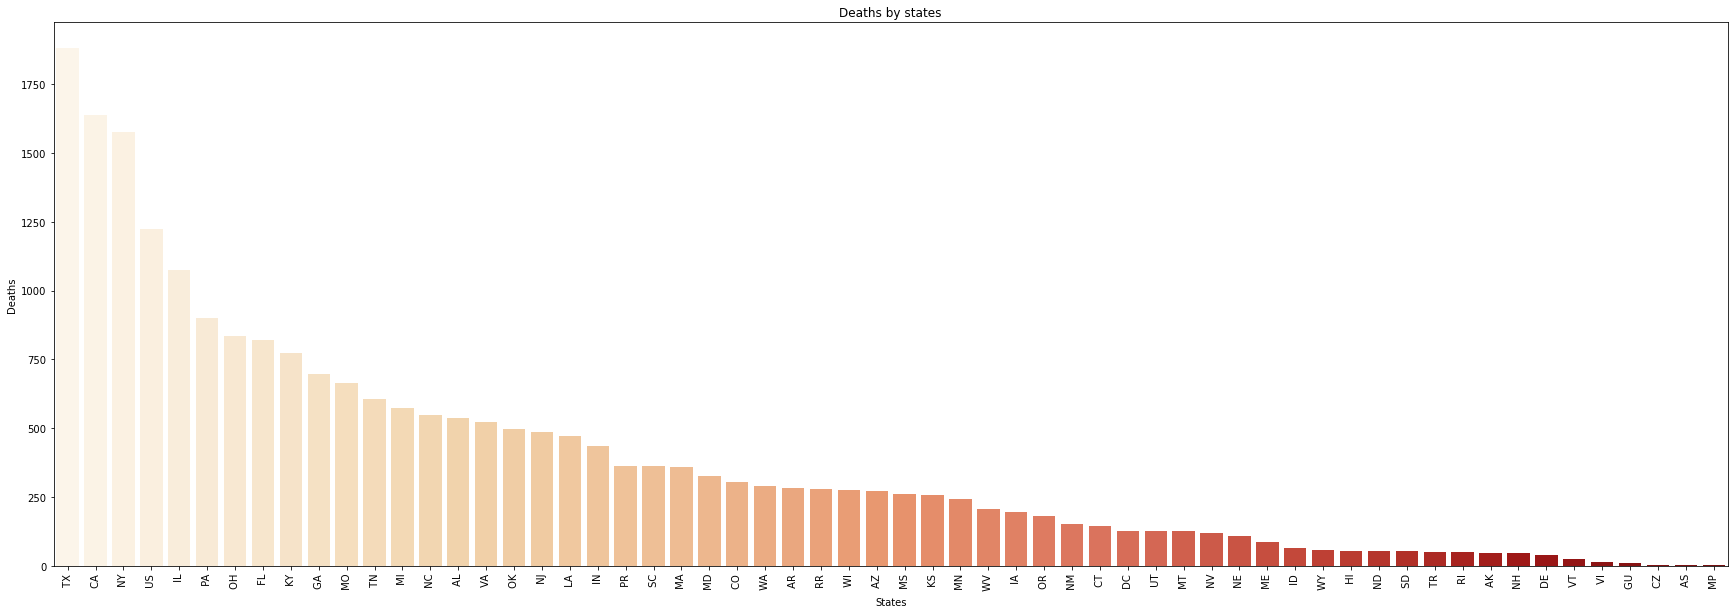

In [28]:
death_df=df['state'].value_counts()
plt.figure(figsize=(30,10))
sns.barplot(death_df.index,death_df.values,palette='OrRd')
plt.title('Deaths by states')
plt.xlabel('States')
plt.ylabel('Deaths')
plt.xticks(rotation=90)
plt.show()

# Create a Visualization of cause of death count by each country in sorted order

In [29]:
deaths = pd.DataFrame(df.groupby(['cause'])['state'].count()).reset_index()
deaths

,cause,state
0,9/11 related illness,110
1,Accidental,80
2,Aircraft accident,381
3,Animal related,82
4,Asphyxiation,2
5,Assault,613
6,Automobile accident,2348
7,Bicycle accident,13
8,Boating accident,13
9,Bomb,57


/Users/parthibanramakrishnan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


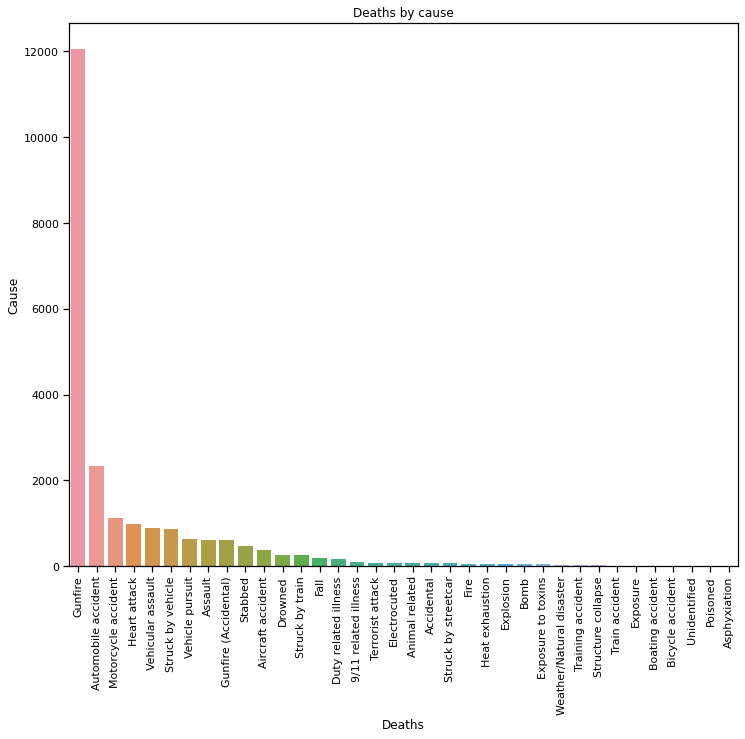

In [30]:
sns.set_context('notebook')
cdf=df.cause.value_counts()
plt.figure(figsize=(12,10))
sns.barplot(cdf.index,cdf.values)
plt.title('Deaths by cause')
plt.xlabel('Deaths')
plt.ylabel('Cause')
plt.xticks(rotation=90)
plt.show()

# Top 10 States in deaths

/Users/parthibanramakrishnan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


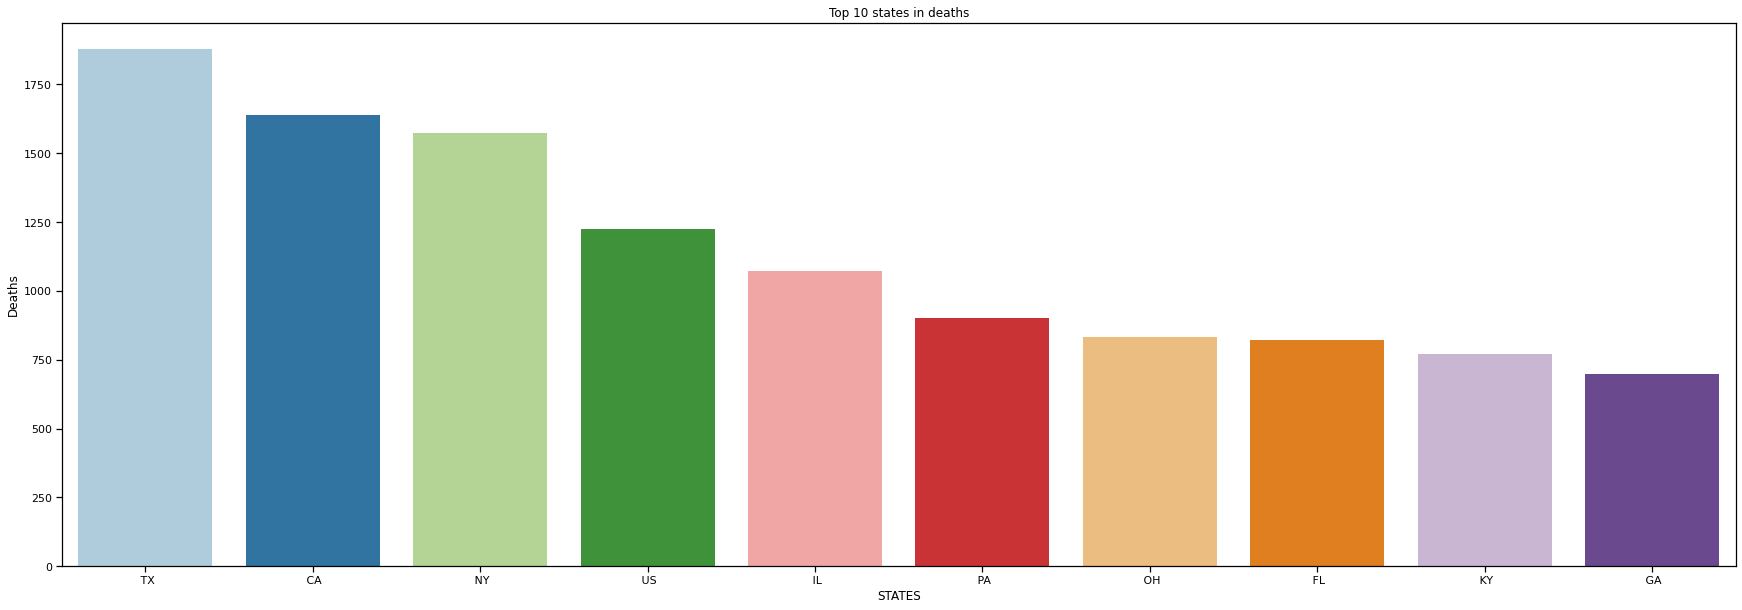

In [31]:
ssdf=df['state'].value_counts()
sdf=ssdf.head(10)
plt.figure(figsize=(30,10))
sns.barplot(sdf.index,sdf.values,palette='Paired')
plt.title('Top 10 states in deaths')
plt.xlabel('STATES')
plt.ylabel('Deaths')
plt.show()

# Police Officer Deaths by Medical

/Users/parthibanramakrishnan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


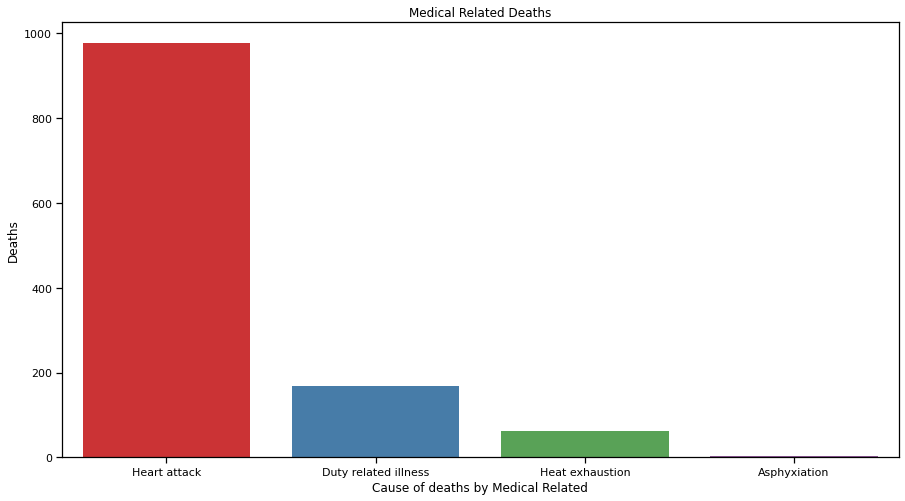

In [32]:
medical=df[df['cause'].isin(['Heart attack', 'Duty related illness', 'Heat exhaustion','Asphyxiation'])]
plt.figure(figsize=(15,8))
ms=medical.cause.value_counts()
sns.barplot(ms.index,ms.values,palette='Set1')
plt.xticks(rotation=0)
plt.xlabel('Cause of deaths by Medical Related')
plt.ylabel('Deaths')
plt.title('Medical Related Deaths')
plt.show()

/Users/parthibanramakrishnan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


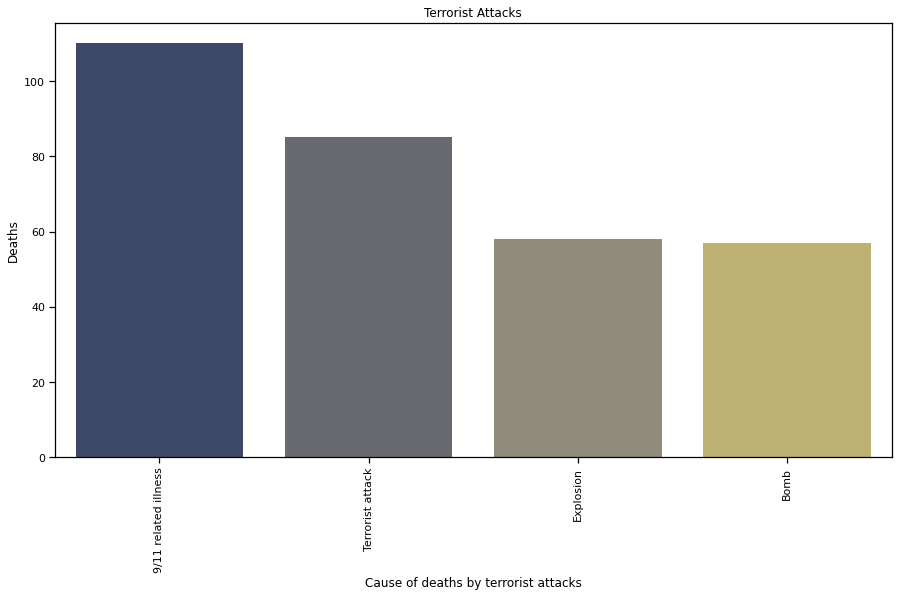

In [33]:
terrorist=df[df['cause'].isin(['Terrorist attack', '9/11 related illness', 'Explosion', 'Bomb'])]
plt.figure(figsize=(15,8))
ts=terrorist.cause.value_counts()
sns.barplot(ts.index,ts.values,palette='cividis')
plt.xticks(rotation=90)
plt.xlabel('Cause of deaths by terrorist attacks')
plt.ylabel('Deaths')
plt.title('Terrorist Attacks')
plt.show()